# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [2]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(16.7698)


## Sampling from categorical probabilities with given probabilities

In [3]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

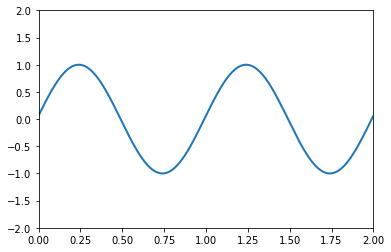

In [4]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

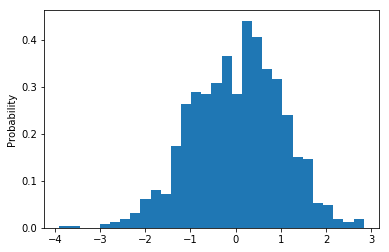

In [5]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

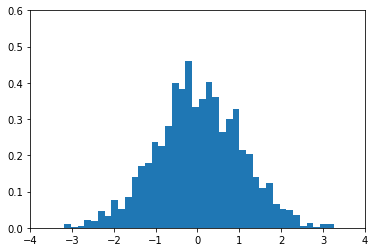

In [6]:
def animate_histogram():
    items = []
    with pyro.plate('data', 2000):
        items = pyro.sample("normal_sampling", pyro.distributions.Normal(0, 1))
    fig, ax = plt.subplots()
    ax.set_xlim(( -4, 4))
    ax.set_ylim((0, 0.6))
    
    def histogram(i):
        if i > 0:
            ax.clear()
            ax.set_xlim(( -4, 4))
            ax.set_ylim((0, 0.6))
            ax.hist(items[:10*i], density=True, bins=40)
        else:
            ax.hist([])

    anim = animation.FuncAnimation(fig, histogram, frames=200, interval=20)
    return HTML(anim.to_jshtml())

animate_histogram()

## Task 2

Ill probability: 1/50000
From Bayes theorem: 0.0009890406305883294. From sampling: 0.0013886133703630231
Ill probability: 10/50000
From Bayes theorem: 0.00980489254233931. From sampling: 0.010264802142219578
Ill probability: 20/50000
From Bayes theorem: 0.019423190111830486. From sampling: 0.020744862595792453
Ill probability: 30/50000
From Bayes theorem: 0.028860169079778442. From sampling: 0.029400442690790108
Ill probability: 40/50000
From Bayes theorem: 0.03812090874085484. From sampling: 0.036415239561285354
Ill probability: 50/50000
From Bayes theorem: 0.047210300429184546. From sampling: 0.04483039089038802
Ill probability: 60/50000
From Bayes theorem: 0.056133056133056115. From sampling: 0.05688821465819664
Ill probability: 70/50000
From Bayes theorem: 0.06489371664013484. From sampling: 0.06323063088645937
Ill probability: 80/50000
From Bayes theorem: 0.0734966592427617. From sampling: 0.07346354527404535
Ill probability: 90/50000
From Bayes theorem: 0.08194610503081026. From 

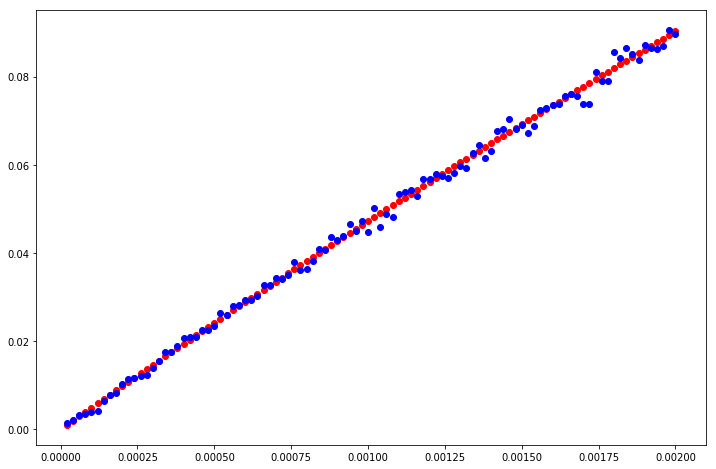

In [7]:
def ill_when_pos_prob_bayes(ill, pos_when_not_ill = 0.02, neg_when_ill = 0.01):
    pos_when_ill = 1 - neg_when_ill
    not_ill = 1 - ill
    all_pos_ill = pos_when_ill*ill
    pos = all_pos_ill + pos_when_not_ill*not_ill
    return all_pos_ill/pos

def get_sampling_count(size, prob):
    total = []
    with pyro.plate('total', size):
        total = pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([1-prob, prob])))
    return torch.sum(total)

def ill_when_pos_prob_sampling(ill_prob, population_size, pos_when_not_ill_prob = 0.02, pos_when_ill_prob = 0.99):
    ill = get_sampling_count(population_size, ill_prob)
    positive_ill = get_sampling_count(ill, pos_when_ill_prob)
    positive_not_ill = get_sampling_count(population_size - ill, pos_when_not_ill_prob)
    positive = positive_ill + positive_not_ill
    return positive_ill.item() / positive.item()

population_size = 1000000
bayes_probs = []
probs = []
experimental_probs = []
for i in range(1, 101):
    ill_prob = i/50000
    probs.append(ill_prob)
    bayes = ill_when_pos_prob_bayes(ill_prob)
    experimental = ill_when_pos_prob_sampling(ill_prob, population_size)
    bayes_probs.append(bayes)
    experimental_probs.append(experimental)
    if(i == 1 or i % 10 == 0):
        print(f'Ill probability: {i}/50000')
        print(f'From Bayes theorem: {bayes}. From sampling: {experimental}')

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(probs, bayes_probs, 'ro')
ax.plot(probs, experimental_probs, 'bo')
plt.show()